In [15]:
import matplotlib.pyplot as plt

In [16]:
import numpy as np
from sklearn import datasets, linear_model,discriminant_analysis,cross_validation

In [17]:
def load_data():
    diabetes = datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data,diabetes.target,
                    test_size = 0.25, random_state = 0)

In [18]:
def test_LinearRegression(*data):
    X_train, X_test,y_train,y_test = data
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    print("Coefficients:%s, intercept %.2f" %(regr.coef_,regr.intercept_))
    print("Residual sum of squares: %.2f" %np.mean((regr.predict(X_test)-y_test)**2))
    print("Score: %.2f" %regr.score(X_test,y_test))

In [19]:
X_train,X_test,y_train,y_test = load_data()
test_LinearRegression(X_train,X_test,y_train,y_test)

Coefficients:[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354], intercept 153.07
Residual sum of squares: 3180.20
Score: 0.36


In [20]:
def test_Ridge(*data):
    X_train,X_test,y_train,_y_test = data
    regr = linear_model.Ridge()
    regr.fit(X_train,y_train)
    print('Coefficients: %s, intercept %.2f' %(regr.coef_,regr.intercept_))
    print('Residual sum of sqaures: %.2f' %np.mean((regr.predict(X_test)-y_test)**2))
    print('Score: %.2f' %regr.score(X_test,y_test))
    

In [21]:
X_train,X_test,y_train,y_test = load_data()
test_Ridge(X_train,X_test,y_train,y_test)

Coefficients: [  21.19927911  -60.47711393  302.87575204  179.41206395    8.90911449
  -28.8080548  -149.30722541  112.67185758  250.53760873   99.57749017], intercept 152.45
Residual sum of sqaures: 3192.33
Score: 0.36


In [28]:
def test_Ridge_alpha(*data):
    X_train,X_test,y_train,y_test = data
    alphas = [0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000]
    scores = []
    for i, alpha in enumerate(alphas):
        regr = linear_model.Ridge(alpha=alpha)
        regr.fit(X_train,y_train)
        scores.append(regr.score(X_test,y_test))
    ##paint picture
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas, scores)
    ax.set_xlabel(r"$\alpha")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Rdige")
    plt.show()

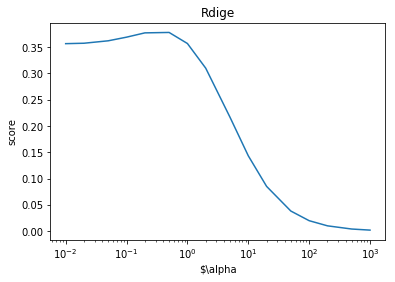

In [29]:
X_train,X_test,y_train,y_test = load_data()
test_Ridge_alpha(X_train,X_test,y_train,y_test)

In [30]:
def test_Lasso(*data):
    X_train,X_test,y_train,_y_test = data
    regr = linear_model.Lasso()
    regr.fit(X_train,y_train)
    print('Coefficients: %s, intercept %.2f' %(regr.coef_,regr.intercept_))
    print('Residual sum of sqaures: %.2f' %np.mean((regr.predict(X_test)-y_test)**2))
    print('Score: %.2f' %regr.score(X_test,y_test))

In [31]:
X_train,X_test,y_train,y_test = load_data()
test_Lasso(X_train,X_test,y_train,y_test)

Coefficients: [  0.          -0.         442.67992538   0.           0.
   0.          -0.           0.         330.76014648   0.        ], intercept 152.52
Residual sum of sqaures: 3583.42
Score: 0.28


In [35]:
def test_Lasso_alpha(*data):
    X_train,X_test,y_train,y_test = data
    alphas = [0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000]
    scores = []
    for i, alpha in enumerate(alphas):
        regr = linear_model.Lasso(alpha=alpha)
        regr.fit(X_train,y_train)
        scores.append(regr.score(X_test,y_test))
    ##paint picture
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas, scores)
    ax.set_xlabel(r"$\alpha")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Lasso")
    plt.show()

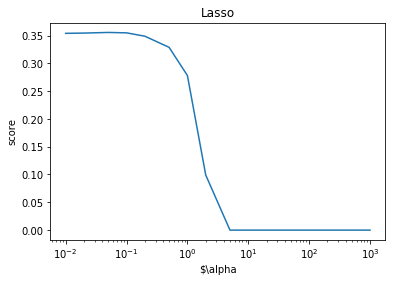

In [36]:
X_train,X_test,y_train,y_test = load_data()
test_Lasso_alpha(X_train,X_test,y_train,y_test)

In [37]:
def test_ElasticNet(*data):
    X_train,X_test,y_train,_y_test = data
    regr = linear_model.ElasticNet()
    regr.fit(X_train,y_train)
    print('Coefficients: %s, intercept %.2f' %(regr.coef_,regr.intercept_))
    print('Residual sum of sqaures: %.2f' %np.mean((regr.predict(X_test)-y_test)**2))
    print('Score: %.2f' %regr.score(X_test,y_test))

In [38]:
X_train,X_test,y_train,y_test = load_data()
test_ElasticNet(X_train,X_test,y_train,y_test)

Coefficients: [ 0.40560736  0.          3.76542456  2.38531508  0.58677945  0.22891647
 -2.15858149  2.33867566  3.49846121  1.98299707], intercept 151.93
Residual sum of sqaures: 4922.36
Score: 0.01


In [45]:
def test_ElasticNet_alpha_rho(*data):
    X_train, X_test,y_train,y_test = data
    alphas = np.logspace(-2,2)
    rhos = np.linspace(0.01,1)
    scores = []
    for alpha in alphas:
        for rho in rhos:
            regr = linear_model.ElasticNet(alpha=alpha, l1_ratio= rho)
            regr.fit(X_train,y_train)
            scores.append(regr.score(X_test,y_test))
    #paint
    alphas, rhos = np.meshgrid(alphas, rhos)
    scores = np.array(scores).reshape(alphas.shape)
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    fig = plt.figure()
    ax = Axes3D(fig)
    surf = ax.plot_surface(alphas,rhos,scores,rstride=1,
     cstride = 1,cmap=cm.jet, linewidth=0,antialiased = False)
    fig.colorbar(surf,shrink=0.5,aspect = 5)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$\rho$")
    ax.set_label("score")
    ax.set_title("ElasticNet")
    plt.show()

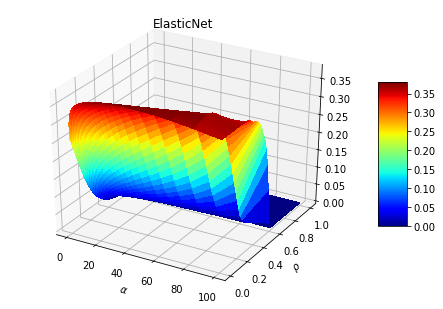

In [46]:
X_train,X_test,y_train,y_test = load_data()
test_ElasticNet_alpha_rho(X_train,X_test,y_train,y_test)